# Remove Distrotion from an edi

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 500

In [2]:
import mtpy.core.mt as mt

INFO:root:module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
INFO:root:Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


2017-09-01T10:37:26 - root - INFO - module file: E:\Githubz\mtpy2\mtpy\utils\mtpylog.pyc
2017-09-01T10:37:26 - root - INFO - Effective yaml configuration file E:\Githubz\mtpy2\mtpy\utils\logging.yml


## Input .edi file name

In [3]:
DATA_DIR=r'E:\GitHubz\mtpy2\examples\data'  # Windows PC
#DATA_DIR=r'/Softlab/Githubz/mtpy2/examples/data'  #VDI: /g/data/ha3/fxz547

edi_fn = os.path.join(DATA_DIR, 'edi_files/pb40c.edi')

In [4]:
mt_obj = mt.MT(edi_fn)

2017-09-01T10:37:26 - mtpy.core.edi - INFO - Reading the edi file E:\GitHubz\mtpy2\examples\data\edi_files/pb40c.edi
2017-09-01T10:37:26 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-09-01T10:37:26 - mtpy.core.edi - INFO - Read in edi file for station pb40


E:\Githubz\mtpy2\mtpy\analysis\zinvariants.py:228: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


## Plot MT response

2017-09-01T10:37:26 - mtpy.core.edi - INFO - Reading the edi file E:\GitHubz\mtpy2\examples\data\edi_files/pb40c.edi
2017-09-01T10:37:26 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-09-01T10:37:26 - mtpy.core.edi - INFO - Read in edi file for station pb40


E:\Githubz\mtpy2\mtpy\imaging\mtplottools.py:471: RuntimeWarning: invalid value encountered in double_scalars
  [np.linalg.det(zzv) ** .5 for zzv in self._Z.z_err])


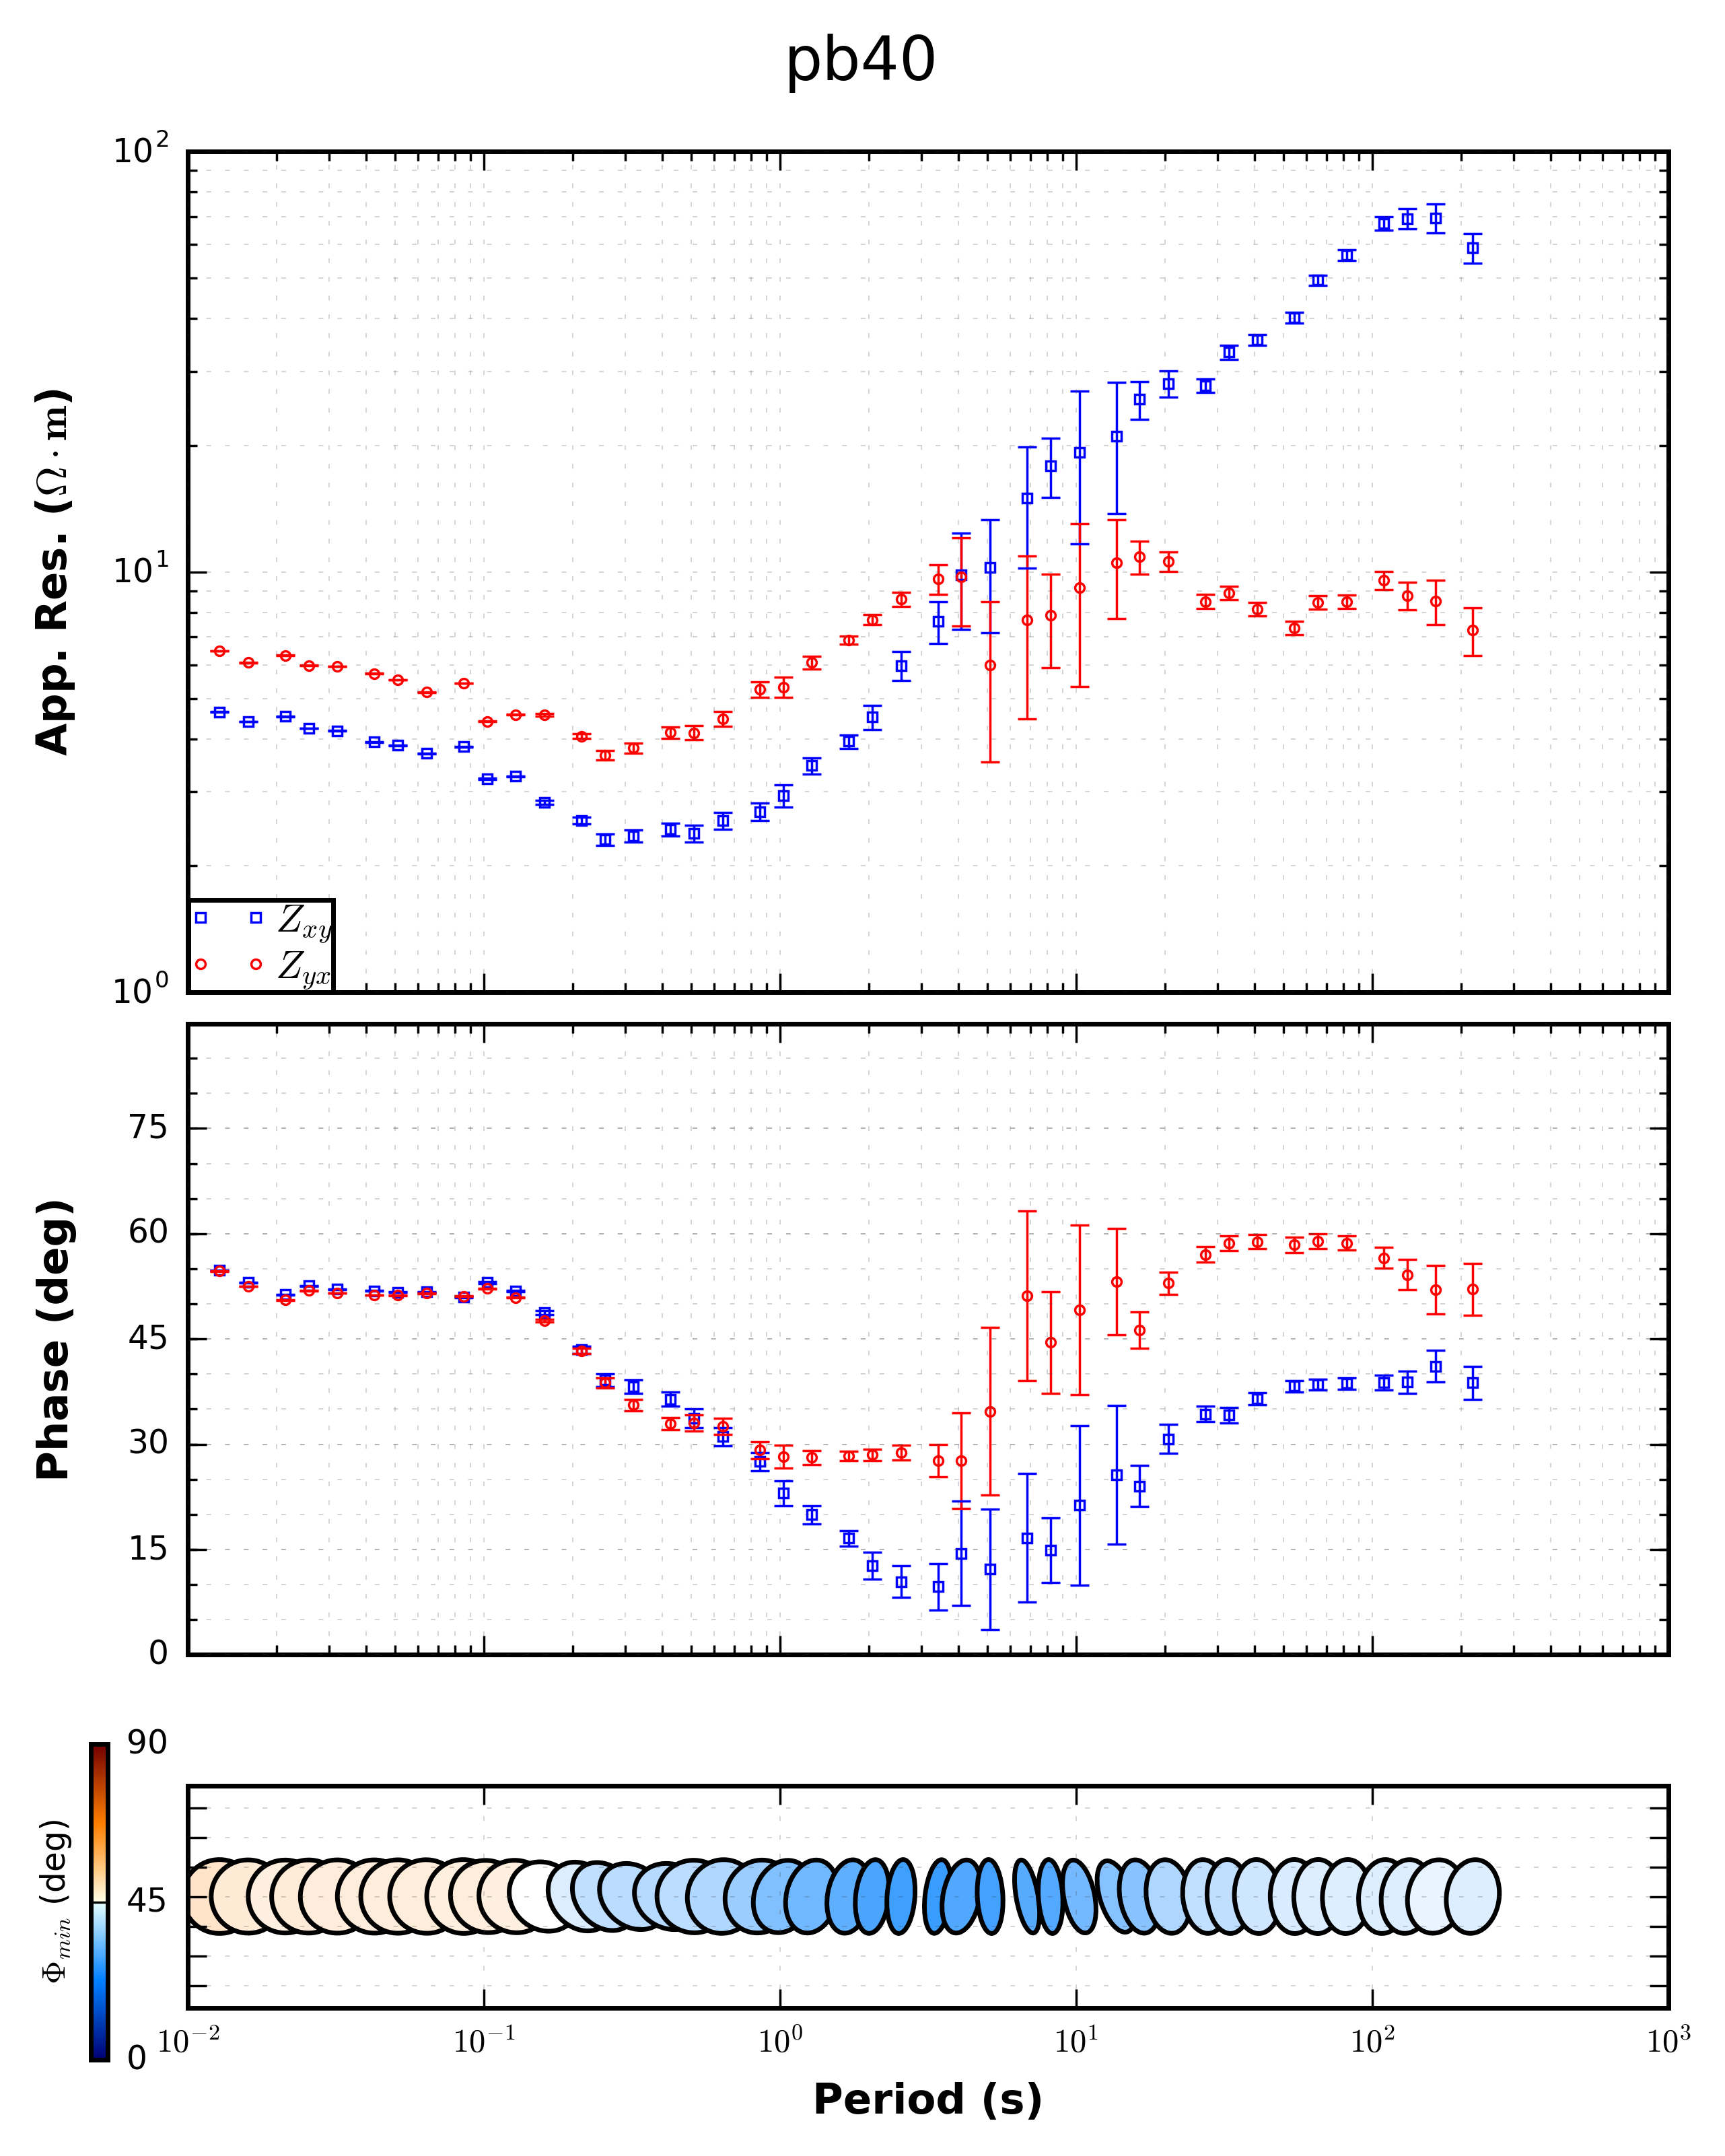

In [5]:
mt_plot = mt_obj.plot_mt_response(plot_pt='y')

In [6]:
help(mt_obj.remove_distortion)

Help on method remove_distortion in module mtpy.core.mt:

remove_distortion(self, num_freq=None) method of mtpy.core.mt.MT instance
    remove distortion following Bibby et al. [2005].
    
    Example
    ----------
    :Remove Distortion and Write New .edi: ::
    
        >>> import mtpy.core.mt as mt
        >>> mt1 = mt.MT(fn=r"/home/mt/edi_files/mt01.edi")
        >>> D, new_z = mt1.remove_distortion()
        >>> mt1.write_edi_file(new_fn=r"/home/mt/edi_files/mt01_dr.edi",            >>>                    new_Z=new_z)



In [7]:
# OR 
mt_obj.remove_distortion?

## Remove distortion following Bibby et al. (2005)

In [8]:
distortion, new_z = mt_obj.remove_distortion()
print distortion
mt_obj.write_edi_file(new_fn=r"/tmp/pb40c_dr.edi",  new_Z=new_z)

[[ 0.91646694  0.07193551]
 [-0.01232709  1.09030773]]
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Converted input latitude to decimal degrees: -30.208029
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Converted input longitude to decimal degrees:  139.701170
('seconds=', 28.904399999999271)
0.9044
9044.0
('seconds=', 4.211999999965883)
0.212
2120.0
2017-09-01T10:37:29 - mtpy.core.edi - DEBUG - key value: maxsect mtpy 'Header' object has no attribute 'maxsect'
('seconds=', 28.904399999999271)
0.9044
9044.0
('seconds=', 4.211999999965883)
0.212
2120.0
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Writing out data a impedances
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Wrote E:\tmp\pb40c_dr.edi


## Plot new MT response

2017-09-01T10:37:29 - mtpy.core.edi - INFO - Reading the edi file /tmp/pb40c_dr.edi
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Read in edi file for station pb40
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Reading the edi file /tmp/pb40c_dr.edi
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Could not find any Tipper data.
2017-09-01T10:37:29 - mtpy.core.edi - INFO - Read in edi file for station pb40


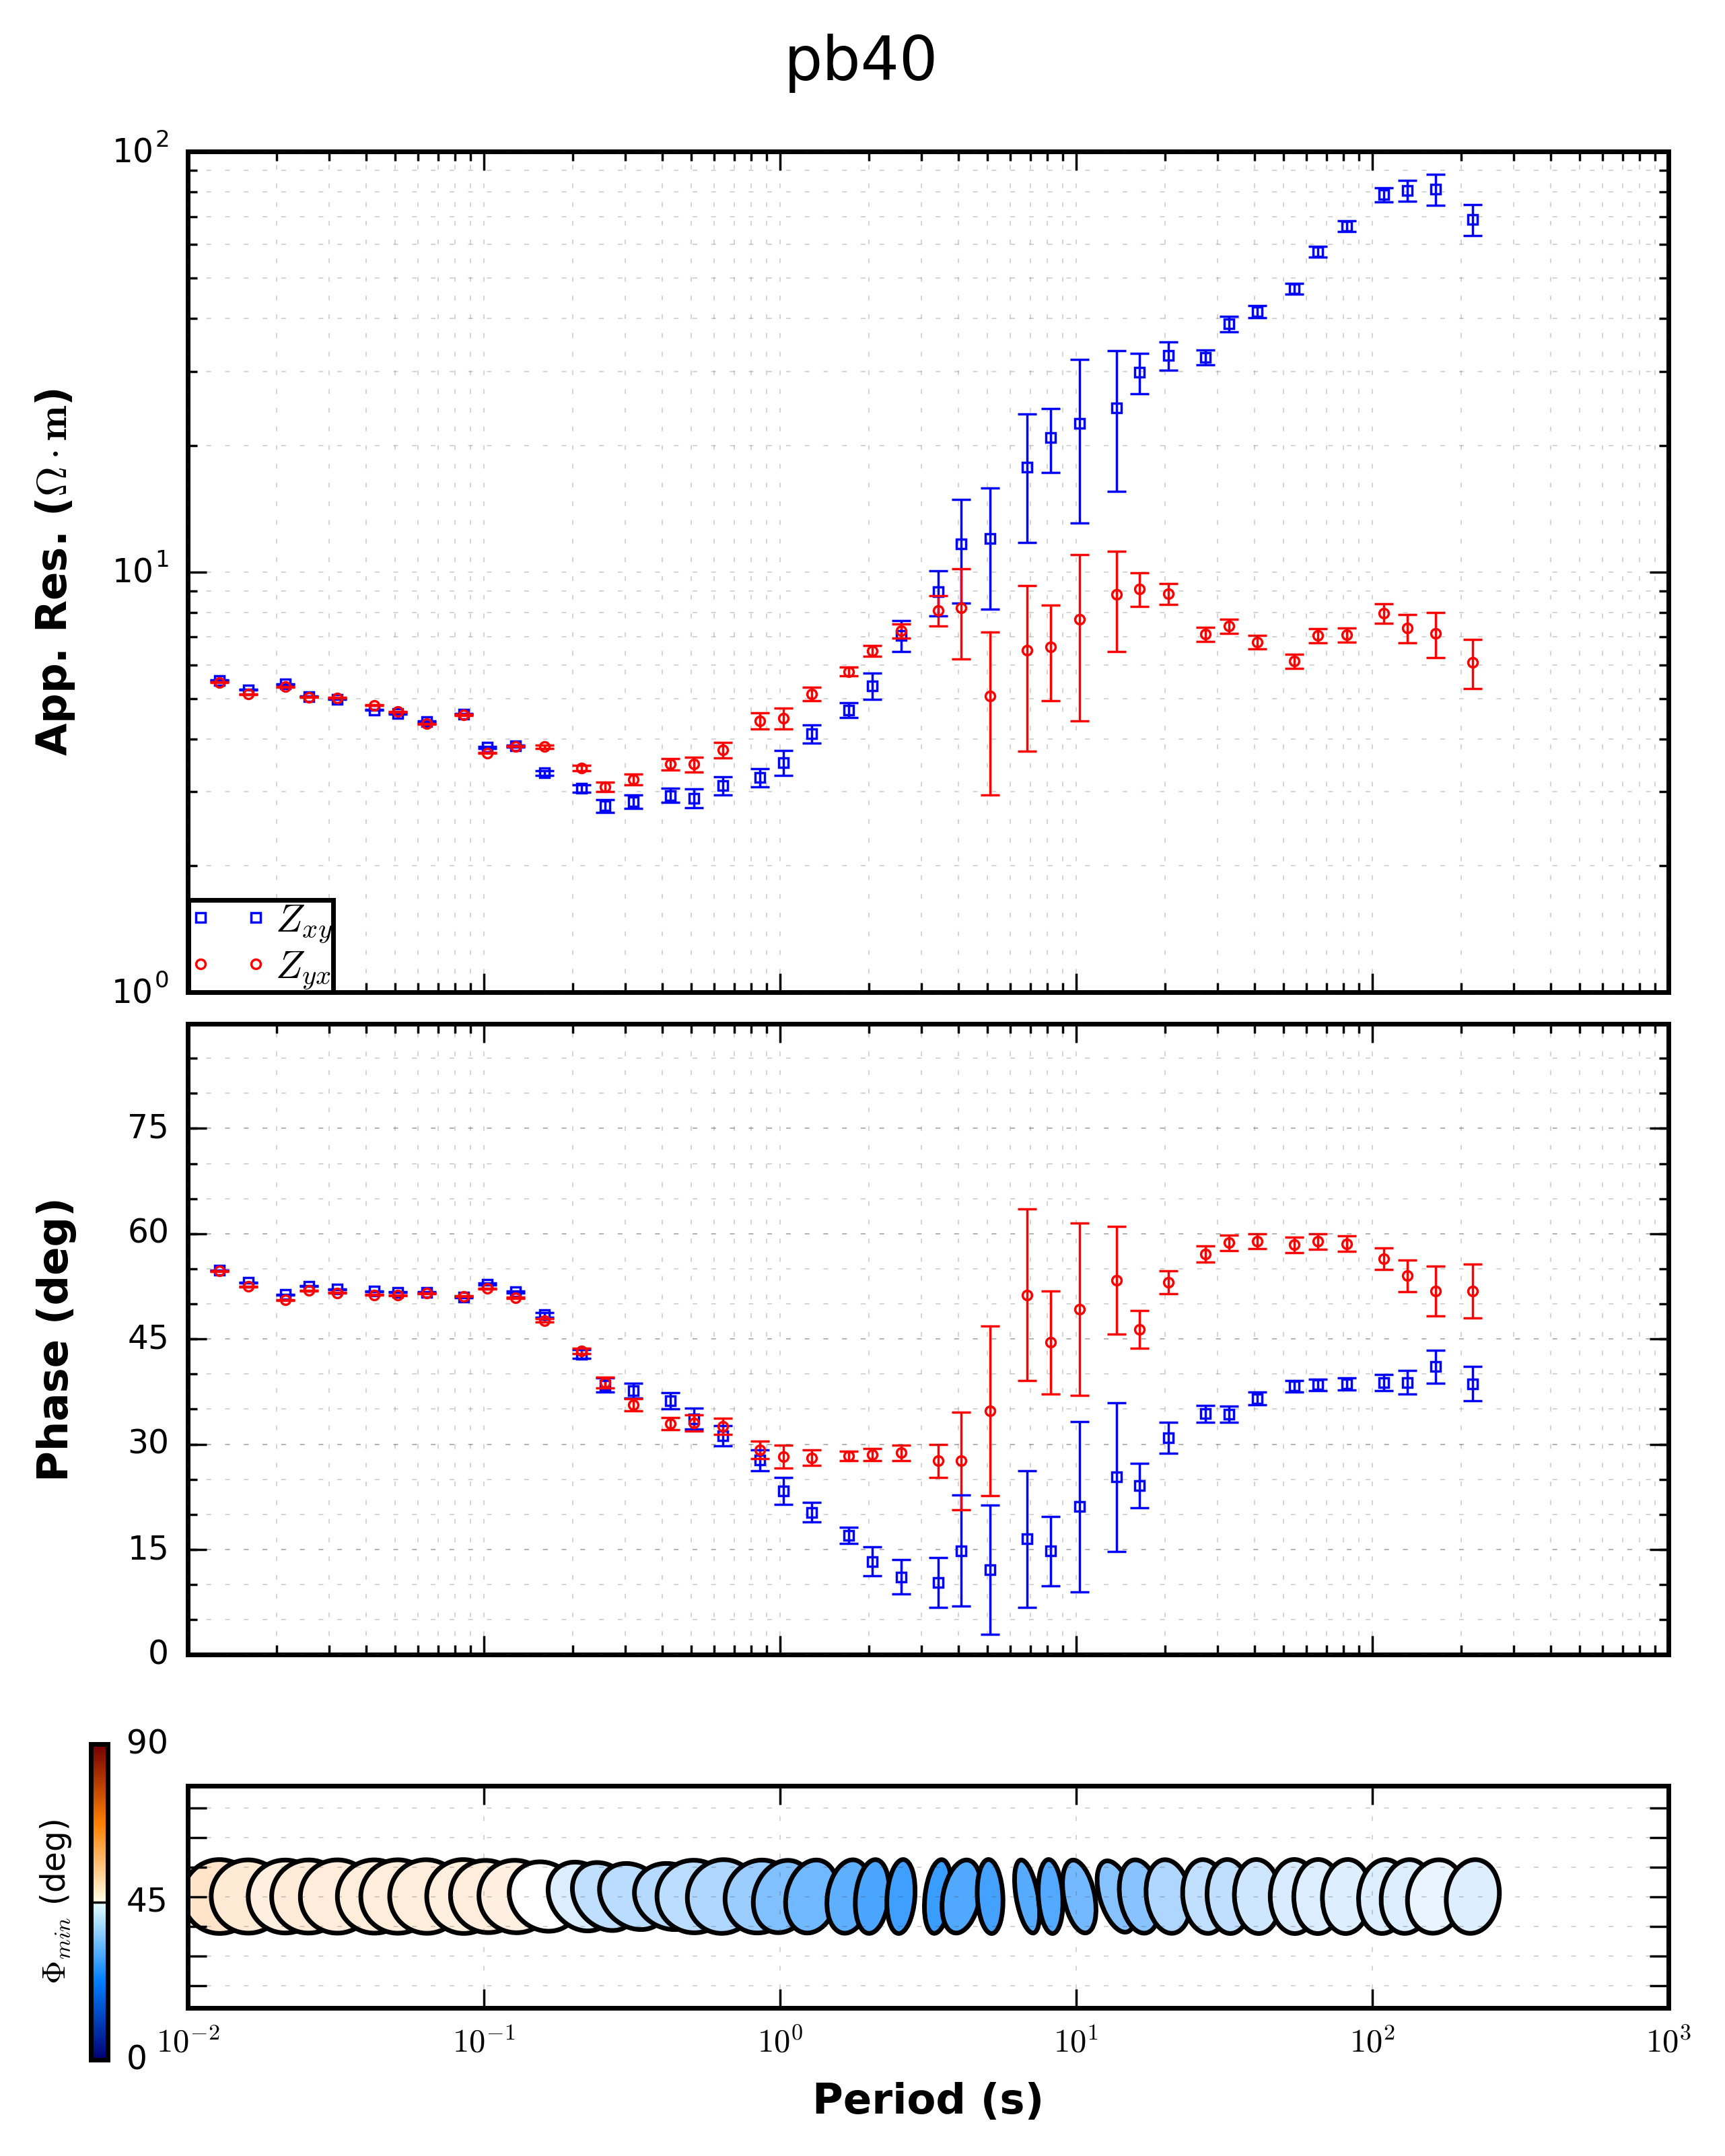

In [9]:
mt_obj_dr = mt.MT(r"/tmp/pb40c_dr.edi")
mt_plot_dr = mt_obj_dr.plot_mt_response(plot_pt='y')